# INFO 2950 Project Phase II

## Our Research Question 

To what extent is the language chosen in bilingual program schools in New York City influenced by the ethnic/racial breakdown of the school (and economic factors)?

Read more about our research question and listen to the podcast that inspired us: https://www.nytimes.com/2020/07/23/podcasts/nice-white-parents-serial.html

## Data Description 

The **2020-2021 Bilingual Program Dataset** was sourced from NYC OpenData. The information within this dataset reports all of the bilingual programs in New York City for the 2020-2021 school year, sorted by program type and language per school. It is organized by borough and school district. NYC OpenData was developed as part of an initiative to make the NYC government more accessible, transparent and accountable. The open, free, public data is produced by various city agencies, including the Department of Education, Department of Buildings, New York City Taxi and Limousine Commission, Board of Corrections, etc. By centralizing data from all these NYC agencies, the hope is that citizens will have a more efficient way to find useful, machine-readable data.
This particular data is owned and provided by the New York City Department of Education. Regarding influences on data collection, because this should be a comprehensive list of schools with bilingual programs in the city, there should not be schools that are excluded, at least not on purpose. Whether a school has a bilingual program or not is public information and should be relatively easy to collect, and thus there should not be any problems in terms of collection bias and recording. The stakeholders here are the schools, not any individuals in particular, so there should also not be problems with the misuse of information, especially since it is not personal information. Data collected within this dataset that was preprocessed includes the language translated column to the language written in English. For example, columns that indicate the language as Spanish have the language translated column to be preprocessed to Español. In addition, the school DBN column was also preprocessed from the given school name as individuals are more likely to know the school name and then the data preprocesses the name of the school to the school DBN. 

There are 538 rows, each corresponding to a different NYC school. There are 11 columns, detailing borough, borough/citywide office, district, school, school name, school category (K-8, elementary, early childhood, etc.), program, program language, program language translated into the respective language, whether the school is a general or special education school, and special education model. Based on the website, there is no evidence of preprocessing of the data. However, the data is quite clean already, so it could be possible that there was some data cleaning done on the part of NYC OpenData, primarily just figuring out which schools had bilingual programs, and inputting all the corresponding information about the school itself to prevent the dataset from having any null or NaN values.


Similar to the bilingual dataset, the **2019-20 Demographic Snapshot Dataset** was also sourced from NYC Open Data which was created by the NYC government in order to make the NYC government more accessible and transparent. Likewise, this dataset is also owned by the NYC Department of Education.This dataset details student demographics and enrollment data by school from 2015-2016 through 2019 to 2020. These enrollment counts were taken on October 31st for all of the audited register schools for each school year. There are 9,096 rows and 39 columns with each column detailing specific information regarding the schools in the rows. Some of the columns include the DBN, the year that the count was taken in, the breakdown by school grade, ethnic breakdown, and the percentage of students in poverty at the school. The 9096 rows do not include 9096 individual schools but rather each school can have multiple rows in order to detail the snapshot for each individual year. 

Because the data was recorded on October 31st for all of the years for all of the schools, the numbers presented do not account for the whole makeup of the population till the end of the year. For example, students who moved to a new school are not counted for if they joined after October 31st. Because the observations were from an audited register, the schools could not change their numbers significantly since the observation was accounted for by an official. 

Preprocessing conducted during the collection of this dataset includes determining the definition of poverty and the threshold students need to meet in order to be counted into the percentage of poverty reported to the Department of Education on this particular dataset. Along with the poverty threshold, preprocessing also includes forming the economic need index. 
The schools were not involved in the process of data collection. Although we are counting the number of students within each category, the students were not involved in the process of data collection and the purpose of this dataset that is provided by the NYCDOE is to create more transparency and accountability amongst the schools and the public. 


### Data Cleaning
Our goal for data cleaning was to merge two datasets together, one containing a list of all the schools in NYC that had bilingual programs, and another that contained demographic data for each school. To do this, we first cleaned each separately by fixing data types to match each other and keeping only the data for the year that we wanted. We got rid of the null values and then merged the two datasets.

In [2]:
## load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
bilingual_data = pd.read_csv("bilingual_rates.csv")

# COLUMNS
# print(bilingual_data.columns)
bilingual_data.rename(columns={"School Name":"school_name", "School": "DBN"}, inplace=True)
bilingual_data = bilingual_data.drop(columns = ['Language (Translated)', 'Special Education Model'])
# print(bilingual_data.head())
# print(bilingual_data)


# FIXING DATA TYPES
# print(bilingual_data.dtypes)
# change DBN + school name to string, district is already an int
bilingual_str_columns = ['Borough', 'Borough/Citywide Office (B/CO)', 'DBN', 'school_name', 'School Category', 'Program', 'Language', 'General/Special Education']
bilingual_data[bilingual_str_columns] = bilingual_data[bilingual_str_columns].astype("string")
# print(bilingual_data.dtypes)


# GETTING RID OF NULL'S
# print(len(bilingual_data))
notnull_array = bilingual_data.notnull()
notnull_array.head()

# include only rows that do not contain null values
bilingual_data = bilingual_data[notnull_array]
bilingual_data
# print(len(bilingual_data))


# DROP ACCESS AND TRANSITIONAL SCHOOLS
dropSchools = bilingual_data.loc[(bilingual_data['Borough/Citywide Office (B/CO)'] == "ACCESS") | (bilingual_data['Program'] != "Dual Language")]

print(dropSchools)

bilingual_data.drop(dropSchools.index, inplace=True)
display(bilingual_data)


# OTHER DATA CLEANING
print(bilingual_data.shape)

       Borough Borough/Citywide Office (B/CO)  District     DBN  \
6    Manhattan                         ACCESS         1  01M515   
7    Manhattan                         ACCESS         1  01M515   
9    Manhattan                      Manhattan         2  02M002   
10   Manhattan                      Manhattan         2  02M042   
11   Manhattan                      Manhattan         2  02M130   
..         ...                            ...       ...     ...   
533      Bronx                    District 75        75  75X811   
534      Bronx                    District 75        75  75X811   
535      Bronx                    District 75        75  75X811   
536  Manhattan                         ACCESS        79  79M973   
537     Queens                         ACCESS        79  79Q950   

                                 school_name   School Category  \
6    Lower East Side Preparatory High School       High school   
7    Lower East Side Preparatory High School       High school 

,Borough,Borough/Citywide Office (B/CO),District,DBN,school_name,School Category,Program,Language,General/Special Education
0,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,General Education
1,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Spanish,General Education
2,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,General Education
3,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,Special Education
4,Manhattan,Manhattan,1,01M188,P.S. 188 The Island School,K-8,Dual Language,Spanish,General Education
...,...,...,...,...,...,...,...,...,...
499,Brooklyn,Brooklyn North,32,32K556,Bushwick Leaders High School for Academic Exce...,High school,Dual Language,Spanish,Special Education
500,Brooklyn,Brooklyn North,32,32K562,Evergreen Middle School for Urban Exploration,Junior High-Intermediate-Middle,Dual Language,Spanish,General Education
503,Brooklyn,District 75,75,75K373,P.S. 373 - Brooklyn Transition Center,High school,Dual Language,Spanish,Special Education
524,Bronx,District 75,75,75X186,P186X Walter J. Damrosch School,K-12 all grades,Dual Language,Spanish,Special Education


(264, 9)


In [4]:
demographic_data = pd.read_csv("demographic_schools.csv")

# COLUMNS
# print(demographic_data.columns)
demographic_data.rename(columns={"School Name":"school_name"}, inplace=True)
# print(demographic_data)



# FIXING DATA TYPES
# print(demographic_data.dtypes) # DBN + school name + year should be string; # Poverty, % Poverty, Economic Need Index should be ints/floats
dem_str_columns = ['DBN', 'school_name', 'Year']
demographic_data[dem_str_columns] = demographic_data[dem_str_columns].astype("string")
# dem_num_columns = ['# Poverty', '% Poverty', 'Economic Need Index'] –– have special values like "Above 95%" and others are decimals..
# demographic_data[dem_num_columns] = demographic_data[dem_num_columns].astype("string").replace("%", "")
# print(demographic_data[dem_num_columns])

# print(demographic_data.dtypes)
# print(demographic_data)


# ONLY KEEP 2019-20 DATA
demographic_data = demographic_data[demographic_data['Year'] == "2019-20"]
demographic_data




# GETTING RID OF NULL'S
# print(len(demographic_data))

## boolean array of whether or not an entry is not null
notnull_array = demographic_data.notnull()
notnull_array.head()

# include only rows that do not contain null values
demographic_data = demographic_data[notnull_array]
demographic_data.head()
# print(len(demographic_data))


# OTHER DATA CLEANING
demographic_data.shape
# demographic_data.describe()

(1868, 39)

In [5]:
# MERGE:
bilingual_demographic_data = pd.merge(bilingual_data, demographic_data, on="DBN")
# bilingual_demographic[3:200:5]
bilingual_demographic_data

,Borough,Borough/Citywide Office (B/CO),District,DBN,school_name_x,School Category,Program,Language,General/Special Education,school_name_y,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,General Education,P.S. 020 Anna Silver,...,0.034,31,0.067,102,0.220,61,0.131,352,75.9%,78.2%
1,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Spanish,General Education,P.S. 020 Anna Silver,...,0.034,31,0.067,102,0.220,61,0.131,352,75.9%,78.2%
2,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,General Education,P.S. 184m Shuang Wen,...,0.069,52,0.074,117,0.165,99,0.140,469,66.3%,67.2%
3,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,Special Education,P.S. 184m Shuang Wen,...,0.069,52,0.074,117,0.165,99,0.140,469,66.3%,67.2%
4,Manhattan,Manhattan,1,01M188,P.S. 188 The Island School,K-8,Dual Language,Spanish,General Education,P.S. 188 The Island School,...,0.008,9,0.023,135,0.339,39,0.098,Above 95%,Above 95%,Above 95%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Brooklyn,Brooklyn North,32,32K556,Bushwick Leaders High School for Academic Exce...,High school,Dual Language,Spanish,Special Education,Bushwick Leaders High School for Academic Exce...,...,0.029,4,0.012,84,0.248,92,0.271,Above 95%,Above 95%,93.4%
260,Brooklyn,Brooklyn North,32,32K562,Evergreen Middle School for Urban Exploration,Junior High-Intermediate-Middle,Dual Language,Spanish,General Education,Evergreen Middle School for Urban Exploration,...,0.000,11,0.029,89,0.234,66,0.174,351,92.4%,91.8%
261,Brooklyn,District 75,75,75K373,P.S. 373 - Brooklyn Transition Center,High school,Dual Language,Spanish,Special Education,P.S. 373 - Brooklyn Transition Center,...,0.017,24,0.050,475,0.996,120,0.252,433,90.8%,93.5%
262,Bronx,District 75,75,75X186,P186X Walter J. Damrosch School,K-12 all grades,Dual Language,Spanish,Special Education,P186X Walter J. Damrosch School,...,0.022,14,0.018,763,0.999,223,0.292,718,94.0%,Above 95%


In [6]:
bilingual_demographic_data.to_csv('bilingual_demographic-data.csv', index=False)

### Exploratory Data Analysis

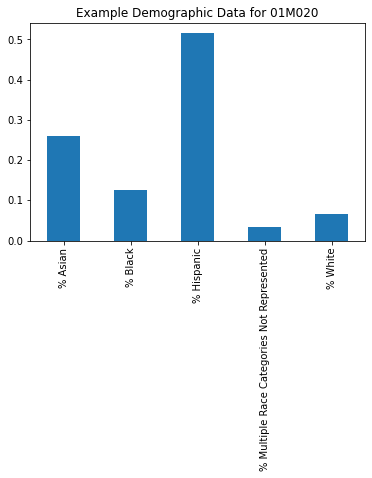

All Languages:  ['Arabic', 'Chinese', 'French', 'Haitian Creole', 'Italian', 'Japanese', 'Korean', 'Polish', 'Russian', 'Spanish']
10


In [7]:
"""Mean, correlation, standard deviation, 
what is dataset capable of, 
do calculations + histograms + charts if u can, 
write a lot + explain what you’re doing as you go"""

num_race_data = bilingual_demographic_data[['# Asian', '# Black', '# Hispanic', '# Multiple Race Categories Not Represented', '# White']]

percent_race_data = bilingual_demographic_data[['% Asian', '% Black', '% Hispanic', '% Multiple Race Categories Not Represented', '% White']]

#demographic data for school DBN 01M020
specific_percent_race_data = bilingual_demographic_data.loc[0, ['% Asian', '% Black', '% Hispanic', '% Multiple Race Categories Not Represented', '% White']]
specific_percent_race_data.describe()
specific_percent_race_data.plot.bar()
plt.title("Example Demographic Data for 01M020")
plt.show()
# [HERE, how do for breakdown WITHIN specific school]

# most common language across all schools?
languages = bilingual_demographic_data['Language'].unique()
languages = sorted(languages)
print("All Languages: ", languages)
print(len(languages))



display(bilingual_demographic_data.groupby("Language").DBN)
# bilingual_demographic_data.head()

# (most common) ethnic breakdown in each school vs. language –– graph?


# group schools by language + see the average ethnic breakdown

# line graph for correlation/linear regression

#### KMeans
For our exploratory data analysis, our intial goal was to create a kMeans clustering model. We wanted to plot the data for the language program against the data for the most prominent ethic group for the school to see if the school language program matches the school ethnic breakdown. To do this, we wrote each language and ethnicity to a number and fit the data to a kMeans cluster. However, after trying to cluster the data, we realized this model would not work because our data maps out to discrete data points which can not be clustered because the points are layed on top of each other.

In [8]:
# kmeans clustering (predicted bilingual language based on most common ethnic group vs. actual bilingual language)
#mostCommonEthnicGroup = percent_race_data.max(axis=1).key
#print(mostCommonEthnicGroup)
#bilingual_demographic_data['mostCommonEthnicGroup'] = mostCommonEthnicGroup


#find the column name of the max % ethnic group
bilingual_demographic_data['mostCommonEthnicGroup'] = percent_race_data.idxmax(axis=1)

bilingual_demographic_data[['% Asian', '% Black', '% Hispanic', '% Multiple Race Categories Not Represented', '% White', 'mostCommonEthnicGroup']]


# create tables for assigning languages and ethnicity to numbers
assigned_language_lookup = pd.DataFrame({"language_number": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        "Language": languages})

assigned_ethnicity_lookup = pd.DataFrame({"ethnicity_number": [0, 1, 2, 3, 4],
                                        "mostCommonEthnicGroup": ['% Asian', '% Black', '% Hispanic', '% Multiple Race Categories Not Represented', '% White']})

display(assigned_language_lookup)
display(assigned_ethnicity_lookup)

# language_cluster_data
language_cluster_data = pd.merge(bilingual_demographic_data, assigned_language_lookup, on="Language")

ethnicity_cluster_data = pd.merge(bilingual_demographic_data, assigned_ethnicity_lookup, on="mostCommonEthnicGroup")
# language_cluster_data = pd.merge(language_cluster_data, assigned_ethnicity_lookup, on="DBN")

# merging both cluster data sets
full_data = pd.merge(language_cluster_data, ethnicity_cluster_data)

display(full_data)

,language_number,Language
0,0,Arabic
1,1,Chinese
2,2,French
3,3,Haitian Creole
4,4,Italian
5,5,Japanese
6,6,Korean
7,7,Polish
8,8,Russian
9,9,Spanish


,ethnicity_number,mostCommonEthnicGroup
0,0,% Asian
1,1,% Black
2,2,% Hispanic
3,3,% Multiple Race Categories Not Represented
4,4,% White


,Borough,Borough/Citywide Office (B/CO),District,DBN,school_name_x,School Category,Program,Language,General/Special Education,school_name_y,...,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,mostCommonEthnicGroup,language_number,ethnicity_number
0,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,General Education,P.S. 020 Anna Silver,...,102,0.220,61,0.131,352,75.9%,78.2%,% Hispanic,1,2
1,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,General Education,P.S. 184m Shuang Wen,...,117,0.165,99,0.140,469,66.3%,67.2%,% Asian,1,0
2,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,Special Education,P.S. 184m Shuang Wen,...,117,0.165,99,0.140,469,66.3%,67.2%,% Asian,1,0
3,Manhattan,Manhattan,1,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Dual Language,Chinese,General Education,School for Global Leaders,...,83,0.407,17,0.083,172,84.3%,84.7%,% Hispanic,1,2
4,Manhattan,Manhattan,2,02M001,P.S. 001 Alfred E. Smith,Elementary,Dual Language,Chinese,General Education,P.S. 001 Alfred E. Smith,...,73,0.296,49,0.198,187,75.7%,81.1%,% Asian,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Queens,Queens North,24,24Q071,P.S. 071 Forest,Elementary,Dual Language,Polish,General Education,P.S. 071 Forest,...,124,0.185,113,0.168,562,83.8%,70.8%,% Hispanic,7,2
266,Brooklyn,Brooklyn North,14,14K147,P.S. 147 Isaac Remsen,Elementary,Dual Language,Japanese,General Education,P.S. 147 Isaac Remsen,...,69,0.193,31,0.087,230,64.2%,70.1%,% Hispanic,5,2
267,Brooklyn,Brooklyn South,17,17K189,P.S. 189 The Bilingual Center,K-8,Dual Language,Haitian Creole,General Education,P.S. 189 The Bilingual Center,...,150,0.150,154,0.154,891,89.1%,82.8%,% Black,3,1
268,Brooklyn,Brooklyn South,20,20K030,P.S./I.S. 30 Mary White Ovington,K-8,Dual Language,Arabic,General Education,P.S./I.S. 30 Mary White Ovington,...,202,0.207,186,0.191,783,80.4%,77.5%,% White,0,4


In [9]:
# Write out the good data to disk for later reuse
language_cluster_data.to_csv('language_cluster_data.csv', index=False)
full_data.to_csv('full_data.csv', index=False)

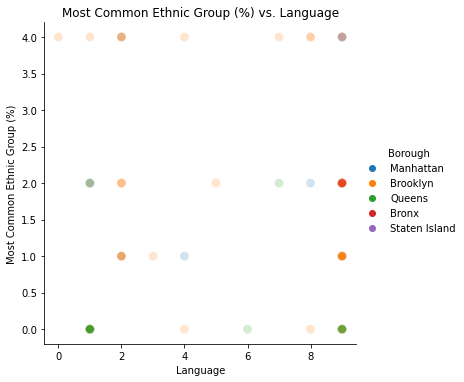

In [10]:
clustering = KMeans(n_clusters = 12)

# execute the KMeans algorithm
clustering.fit(full_data[["language_number", "ethnicity_number"]])


sns.relplot(x="language_number", y="ethnicity_number", hue="Borough",
            data=full_data, s=80, alpha=0.2);
plt.xlabel('Language')
plt.ylabel('Most Common Ethnic Group (%)')
plt.title('Most Common Ethnic Group (%) vs. Language')
plt.show()

# so pretty :')

After realizing that clustering does not work as we intended, we plotted the dat

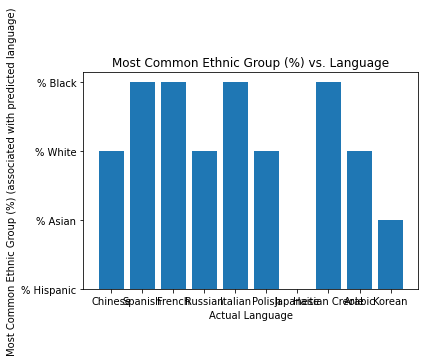

In [11]:
# clustering does not work as intended
# SO BAR GRAPH - predicted language (aka most common ethnicity) vs. actual language

plt.bar(full_data['Language'], full_data['mostCommonEthnicGroup'])

plt.xlabel('Actual Language')
plt.ylabel('Most Common Ethnic Group (%) (associated with predicted language)')
plt.title('Most Common Ethnic Group (%) vs. Language')
plt.show()

# binary –– nOT WORKING :( 

In [85]:
# FOCUS ON ONE LANGUAGE INSTEAD - Spanish
# for all schools with most common ethnicity Hispanic, see how many schools' actual language is Spanish

hispanic_school_languages = full_data.loc[ full_data['mostCommonEthnicGroup'] == "% Hispanic", 'Language']
# [IMPORTANT NOTE: what we discovered: data collection was mainly from Hispanic heavy schools –– FILTER OUT transitional schools + keep only dual language]

# COMPARE ACCURACY OF PREDICTION
def accuracy_by_language(ethnicity, dataframe): 
    percentCorrect = 0
    
    ethnicity_school_languages = full_data.loc[ full_data['mostCommonEthnicGroup'] == ethnicity, 'Language']
    matchedRows = ethnicity_school_languages[full_data['Language'] == "Spanish"]
    # [TODO: CREATE TABLE OF PREDICTED LANGUAGE MAPPINGS WITH MOST COMMON ETHNICITY]
    
    percentCorrect = round(len(matchedRows) / len(ethnicity_school_languages) * 100, 1)
    
    return percentCorrect

accuracy_by_language("% Hispanic", full_data)

# prediction_accuracy['percent_accurate'] = predicted_species_col.apply(accuracy_by_species, dataframe=penguins_predict)

# prediction_accuracy.head()



# [TODO: do for each language + graph percentages using bar graph!!!]
# then do summary statistics - mean, standard deviation, correlation??

95.0

## Data Limitations 

One potential problem with our datasets is the fact that the list of bilingual schools programs is the final publication for the year 2020-2021, while our demographic data is based on 2019-2020 data. However, because it would likely take longer than one school year for the demographics of an area to change a notable amount that it would make a change when doing data analysis, this should not be a substantial problem.

Another potential problem could be the specificity of the raw data. For example, the raw bilingual school data designates the schools by borough and district, however, if we want to get more specific about the location, the zip code of the school might be needed. However, this potential could be solved by manually entering this data based on the name of the school. Furthermore, the raw data does not provide the ethnic breakdown of the individual school. Therefore, when mapping the bilingual data to the demographic data, we might be overlooking the fact that the makeup of the school might not match the demographic makeup of the neighborhood. This could be because children might not always go to the school that is closest to them, but they could be traveling outside of their zone. For elementary schools, because of severe overcrowding in some neighborhoods and certain schools being more popular, some children will be assigned to another school outside of their zone. For middle school, there are zoned schools, where most students go, but there are also choice districts, where students are guaranteed a seat in the district, but can apply to the school that they like, which could be outside of the zone in which they live. For high school, students can choose schools elsewhere in the city from where they live. Therefore, there could be problems regarding mapping demographics to schools based solely on location.

Another potential limitiation to this data is that there are multiple lanauges that could correspond to a specific ethnic group. For example, there are language programs in Chinese, Korean, and Japanese, but these individual races are not specified in the demography data; there is only Asian. This coudl also happen with lanauges such as French, Russian, Italian, and Polish. This could be possibly be addressed by grouping the certain languages together. This could end up making too many assumptions about the population, especially about who speaks what language. To combat this, we look into getting more specific demographic data if this becomes a central part of the project.